In [2]:
import numpy as np
import pandas as pd


In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [4]:
file_path ="C:\\Users\\uppada satwik\\Downloads\\big_mart_data_predictions.csv"
data = pd.read_csv(file_path)

In [5]:
data

,Unnamed: 0,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1,1600.89150
1,1,1067,8.300000,1,0.038428,4,87.3198,2,2007,2,1,1,1346.27100
2,2,1406,14.600000,0,0.099575,11,241.7538,0,1998,2,2,0,588.91925
3,3,809,7.315000,0,0.015388,13,155.0340,2,2007,2,1,1,2417.09900
4,4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3,6255.78660
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,5676,231,10.500000,1,0.013496,13,141.3154,8,1997,2,0,1,2191.08420
5677,5677,306,7.600000,1,0.142991,15,169.1448,3,2009,1,2,2,2468.46260
5678,5678,1412,10.000000,0,0.073529,8,118.7440,7,2002,2,1,1,1874.88930
5679,5679,517,15.300000,1,0.000000,3,214.6218,2,2007,2,1,1,3582.49270


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5681 non-null   int64  
 1   ProductID          5681 non-null   int64  
 2   Weight             5681 non-null   float64
 3   FatContent         5681 non-null   int64  
 4   ProductVisibility  5681 non-null   float64
 5   ProductType        5681 non-null   int64  
 6   MRP                5681 non-null   float64
 7   OutletID           5681 non-null   int64  
 8   EstablishmentYear  5681 non-null   int64  
 9   OutletSize         5681 non-null   int64  
 10  LocationType       5681 non-null   int64  
 11  OutletType         5681 non-null   int64  
 12  OutletSales        5681 non-null   float64
dtypes: float64(4), int64(9)
memory usage: 577.1 KB


In [7]:
data.isnull().sum()

Unnamed: 0           0
ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [8]:
data.drop(columns=["Unnamed: 0"],inplace=True)

In [9]:
data.describe()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,773.386376,12.695633,0.354339,0.065684,7.233410,141.023273,4.722760,1997.828903,1.453617,1.112832,1.201373,2171.000285
std,445.525926,4.245189,0.478355,0.051252,4.219057,61.809091,2.837201,8.372256,0.683048,0.812824,0.796740,1315.007534
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.990000,0.000000,1985.000000,0.000000,0.000000,0.000000,67.741670
25%,382.000000,9.195000,0.000000,0.027047,4.000000,94.412000,2.000000,1987.000000,1.000000,0.000000,1.000000,1068.263900
50%,771.000000,12.695633,0.000000,0.054154,6.000000,141.415400,5.000000,1999.000000,2.000000,1.000000,1.000000,2065.018300
75%,1160.000000,15.850000,1.000000,0.093463,10.000000,186.026600,7.000000,2004.000000,2.000000,2.000000,1.000000,3062.700200
max,1542.000000,21.350000,1.000000,0.323637,15.000000,266.588400,9.000000,2009.000000,2.000000,2.000000,3.000000,7192.552000


first of all try to understand the data then jump into the model

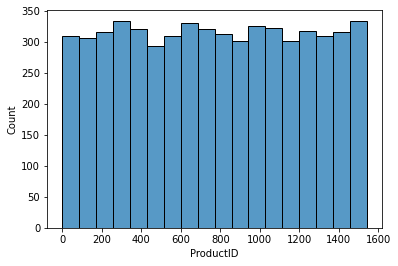

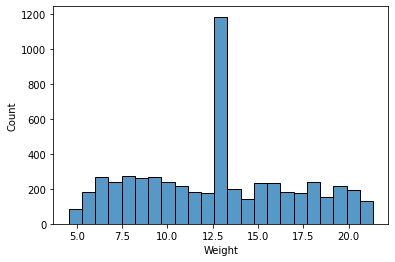

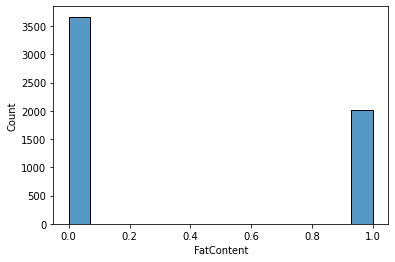

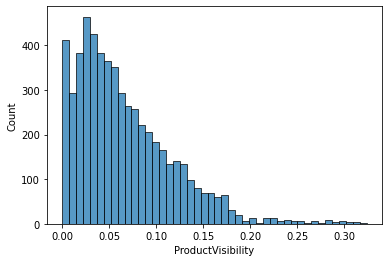

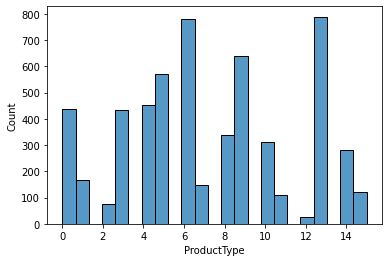

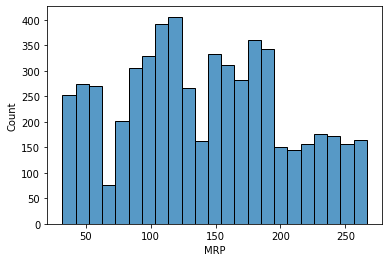

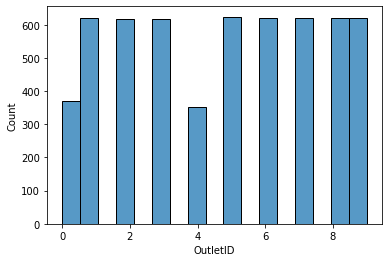

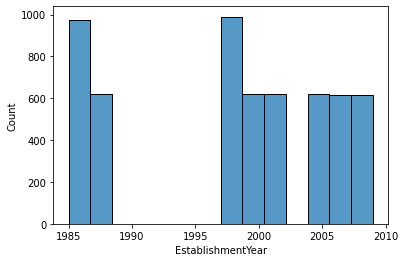

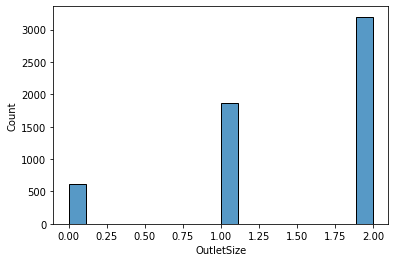

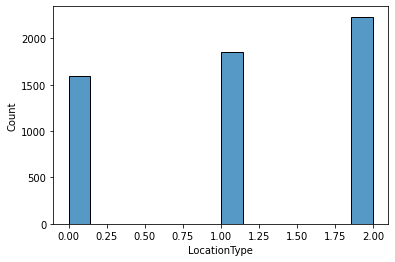

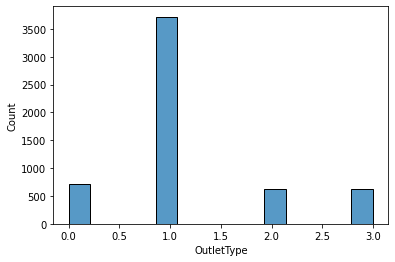

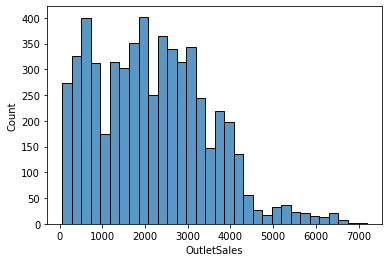

In [10]:
import seaborn as sb
import matplotlib.pyplot as plt

for i in data.columns:
    sb.histplot(data[i])
    plt.show()

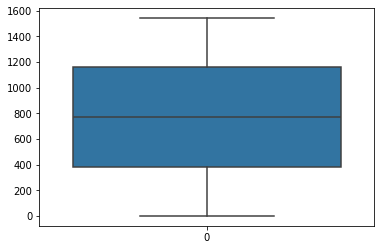

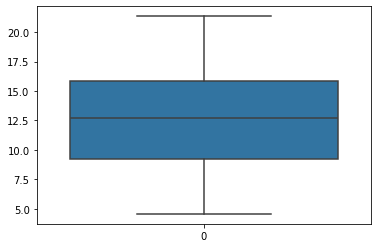

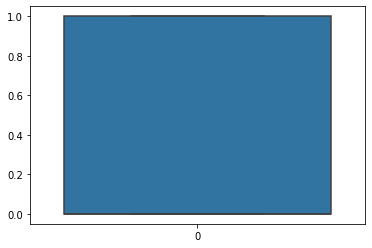

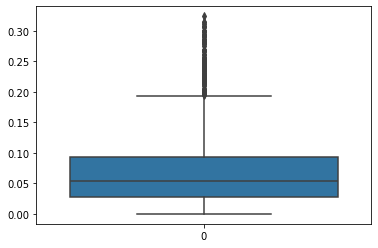

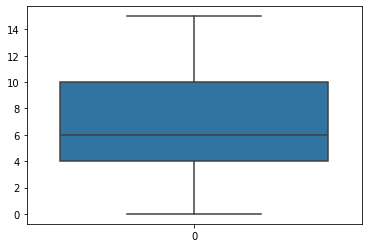

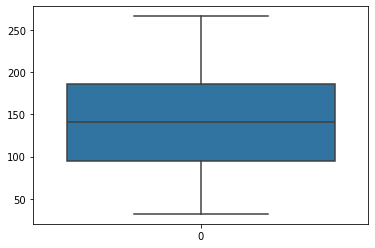

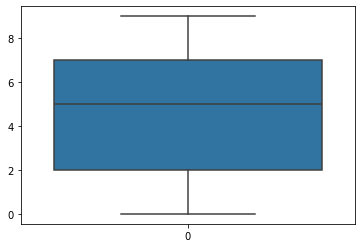

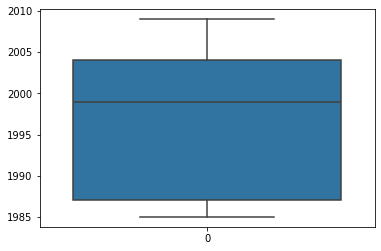

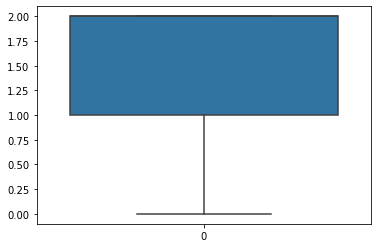

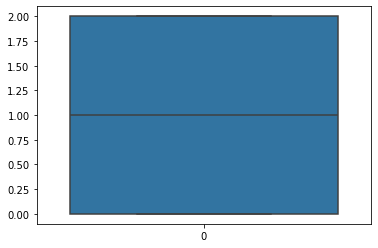

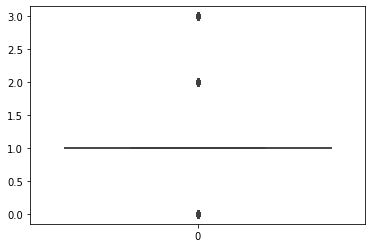

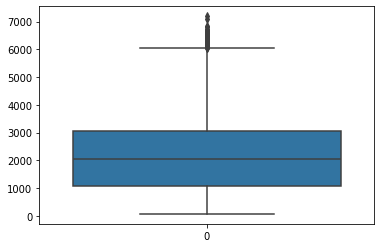

In [11]:
for i in data.columns:
    sb.boxplot(data[i])
    plt.show()

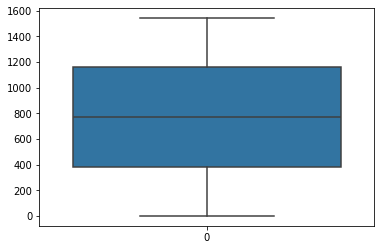

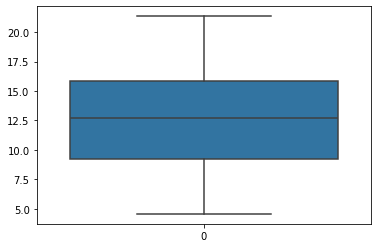

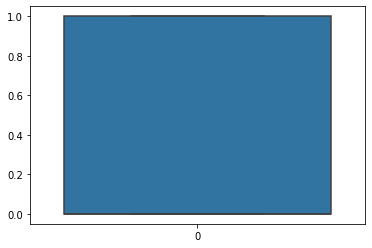

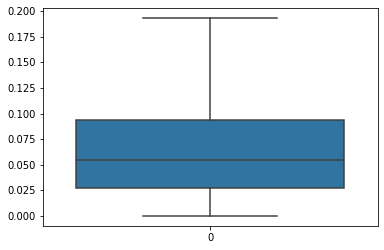

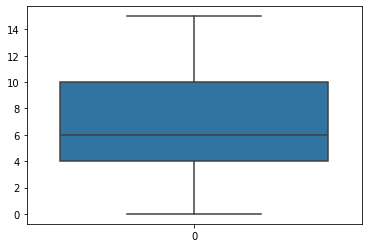

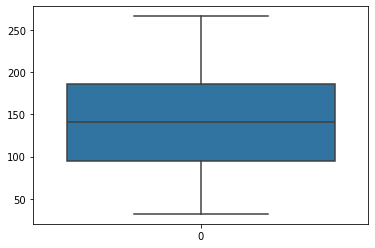

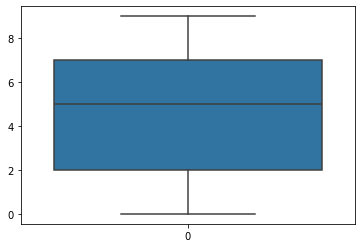

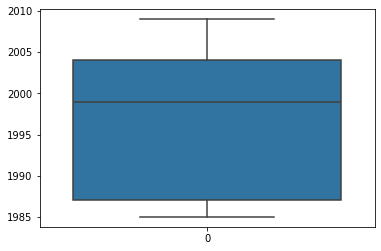

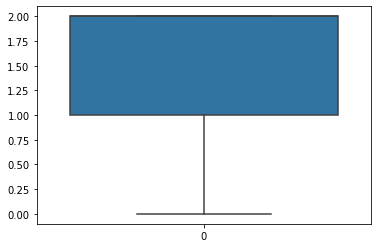

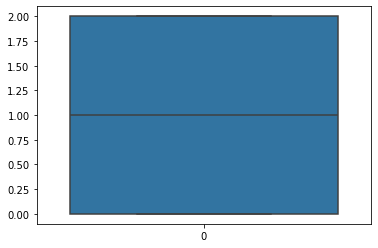

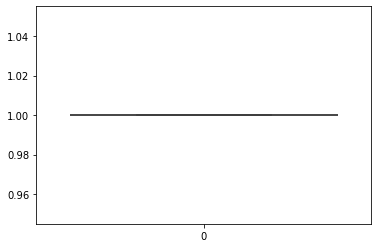

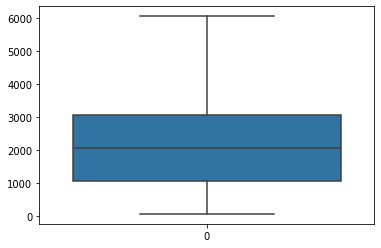

In [12]:
for i in data.columns:
    x1,x3 = np.quantile(data[i],(0.25,0.75))
    iqr = x3-x1
    lw = x1 - (iqr * 1.5)
    uw = x3 + (iqr * 1.5)
    data[i]=np.where(data[i]>uw,uw,np.where(data[i]<lw,lw,data[i]))
    sb.boxplot(data[i])
    plt.show()
    

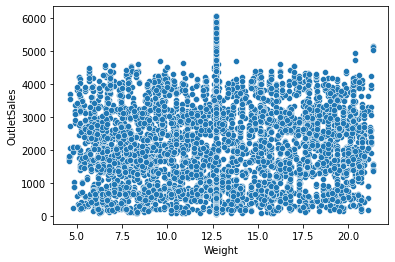

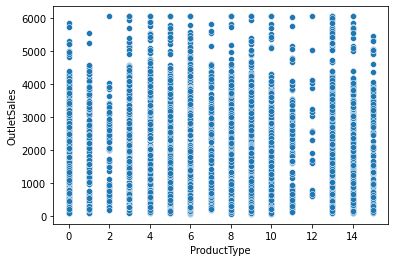

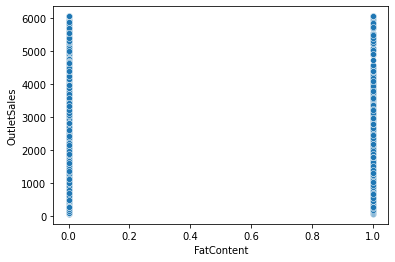

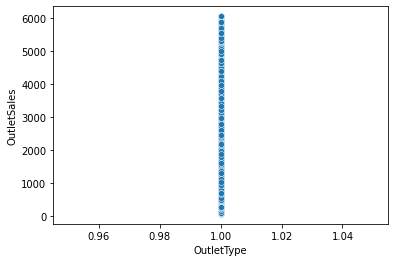

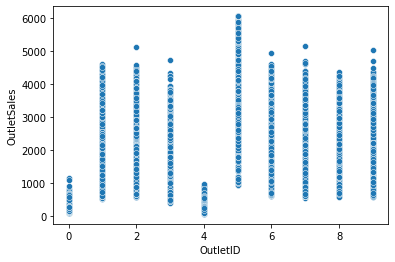

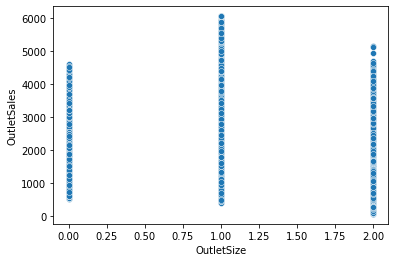

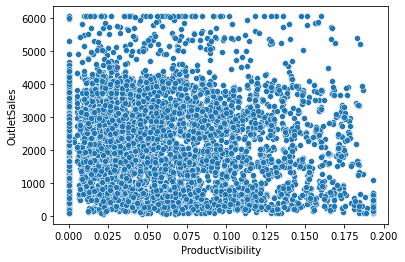

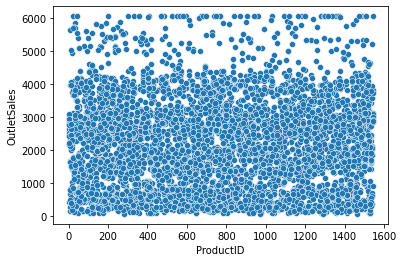

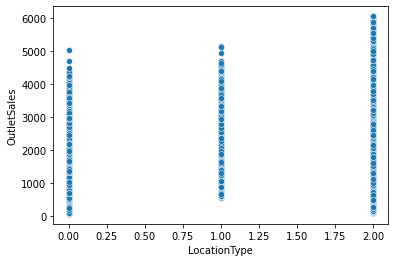

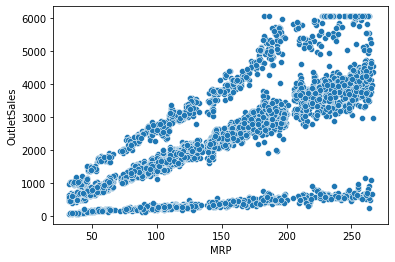

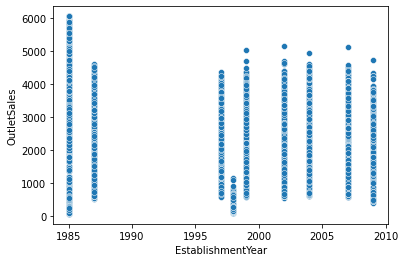

In [13]:
for i in list(set(data.columns)-set({'OutletSales'})):
    sb.scatterplot(y=data['OutletSales'],x=data[i])
    plt.show()

In [14]:
data.drop('ProductID',axis=1).corr().reset_index()

,index,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,Weight,1.000000,-0.043439,-0.016569,0.029657,0.045257,0.020081,0.013548,0.019993,-0.011356,NaN,0.033945
1,FatContent,-0.043439,1.000000,0.039487,-0.160149,-0.019244,-0.003881,-0.004378,0.001546,0.005827,NaN,-0.017220
2,ProductVisibility,-0.016569,0.039487,1.000000,-0.038324,-0.011306,-0.103085,-0.087597,0.081461,0.002260,NaN,-0.138249
3,ProductType,0.029657,-0.160149,-0.038324,1.000000,0.060990,0.000333,0.000204,-0.005345,0.000584,NaN,0.056036
4,MRP,0.045257,-0.019244,-0.011306,0.060990,1.000000,-0.006412,-0.007233,-0.003961,0.001754,NaN,0.724433
5,OutletID,0.020081,-0.003881,-0.103085,0.000333,-0.006412,1.000000,0.079065,0.260136,-0.716113,NaN,0.199339
6,EstablishmentYear,0.013548,-0.004378,-0.087597,0.000204,-0.007233,0.079065,1.000000,0.425619,-0.089496,NaN,-0.059552
7,OutletSize,0.019993,0.001546,0.081461,-0.005345,-0.003961,0.260136,0.425619,1.000000,-0.480025,NaN,-0.210620
8,LocationType,-0.011356,0.005827,0.002260,0.000584,0.001754,-0.716113,-0.089496,-0.480025,1.000000,NaN,0.121394
9,OutletType,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

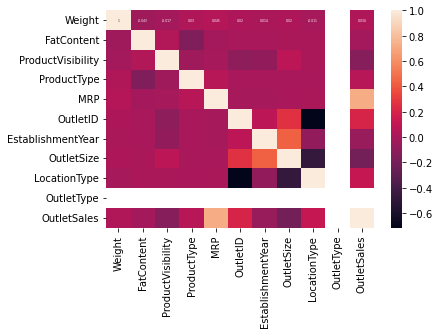

In [15]:

sb.heatmap(data.drop('ProductID',axis=1).corr(),annot=True,annot_kws={'size':3})

In [22]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X=data.drop(["ProductID","OutletSales"],axis=1)
Y=data["OutletSales"]
X = sm.add_constant(X)
X

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,20.750000,0.0,0.007565,13.0,107.8622,9.0,1999.0,1.0,0.0,1.0
1,8.300000,1.0,0.038428,4.0,87.3198,2.0,2007.0,2.0,1.0,1.0
2,14.600000,0.0,0.099575,11.0,241.7538,0.0,1998.0,2.0,2.0,1.0
3,7.315000,0.0,0.015388,13.0,155.0340,2.0,2007.0,2.0,1.0,1.0
4,12.695633,1.0,0.118599,4.0,234.2300,5.0,1985.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,1.0,0.013496,13.0,141.3154,8.0,1997.0,2.0,0.0,1.0
5677,7.600000,1.0,0.142991,15.0,169.1448,3.0,2009.0,1.0,2.0,1.0
5678,10.000000,0.0,0.073529,8.0,118.7440,7.0,2002.0,2.0,1.0,1.0
5679,15.300000,1.0,0.000000,3.0,214.6218,2.0,2007.0,2.0,1.0,1.0


In [17]:
X.columns

Index(['Weight', 'FatContent', 'ProductVisibility', 'ProductType', 'MRP',
       'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType'],
      dtype='object')

In [18]:
Y

0       1600.89150
1       1346.27100
2        588.91925
3       2417.09900
4       6054.35465
           ...    
5676    2191.08420
5677    2468.46260
5678    1874.88930
5679    3582.49270
5680    1317.57180
Name: OutletSales, Length: 5681, dtype: float64

In [19]:
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.3,train_size=0.7 ,random_state=12)

In [20]:
X_train

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
2872,7.360000,0.0,0.052525,5.0,56.4588,3.0,2009.0,1.0,2.0,1.0
4514,6.575000,1.0,0.075935,1.0,144.8444,2.0,2007.0,2.0,1.0,1.0
4175,5.655000,0.0,0.175435,14.0,145.4102,7.0,2002.0,2.0,1.0,1.0
1375,12.695633,0.0,0.103725,8.0,261.7278,5.0,1985.0,1.0,2.0,1.0
1207,5.785000,1.0,0.038915,6.0,264.0252,3.0,2009.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
3916,8.355000,0.0,0.000000,0.0,92.6462,2.0,2007.0,2.0,1.0,1.0
1283,15.000000,1.0,0.044926,0.0,221.9456,0.0,1998.0,2.0,2.0,1.0
3714,7.475000,0.0,0.148397,6.0,242.4854,1.0,1987.0,0.0,2.0,1.0
3325,15.100000,1.0,0.033366,5.0,130.9310,0.0,1998.0,2.0,2.0,1.0


In [21]:
X_train.columns

Index(['Weight', 'FatContent', 'ProductVisibility', 'ProductType', 'MRP',
       'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType'],
      dtype='object')

In [53]:
model = sm.OLS(y_train,X_train[['MRP','const']])

KeyError: "['const'] not in index"

## `Gradient Descent`

In [5]:

import numpy as np

def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 10000
    n = len(x)
    learning_rate = 0.08
    for i in range(iterations):
        """Prediction of y value"""
        # Y = mx + b (regression line formula)
        y_predicted = m_curr * x + b_curr
        
        """Cost Function using Mean square Error"""
        # Cost Function (MSE)
        MSE = (1/n) * sum ([val**2 for val in (y - y_predicted)])
        
        
        """Steps for gradient descent"""
        # step1: Calcualte first order derviative of functions
        md = -(2/n) * sum(x * (y - y_predicted))
        bd = -(2/n) * sum(y - y_predicted)
        
        # step2:  Update values using the derivative and learning rate
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print("m {}, b {}, cost {}, iteration {}".format(m_curr,b_curr,MSE,i))

x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])
gradient_descent(x,y)

m 4.96, b 1.44, cost 89.0, iteration 0
m 0.4991999999999983, b 0.26879999999999993, cost 71.10560000000002, iteration 1
m 4.451584000000002, b 1.426176000000001, cost 56.8297702400001, iteration 2
m 0.892231679999997, b 0.5012275199999995, cost 45.43965675929613, iteration 3
m 4.041314713600002, b 1.432759910400001, cost 36.35088701894832, iteration 4
m 1.2008760606719973, b 0.7036872622079998, cost 29.097483330142282, iteration 5
m 3.7095643080294423, b 1.4546767911321612, cost 23.307872849944438, iteration 6
m 1.4424862661541864, b 0.881337636696883, cost 18.685758762535738, iteration 7
m 3.4406683721083144, b 1.4879302070713722, cost 14.994867596913156, iteration 8
m 1.6308855378034224, b 1.0383405553279617, cost 12.046787238456794, iteration 9
m 3.2221235247119777, b 1.5293810083298451, cost 9.691269350698109, iteration 10
m 1.7770832372205707, b 1.1780607551353204, cost 7.8084968312098315, iteration 11
m 3.0439475772474127, b 1.5765710804477953, cost 6.302918117062937, iteration 1

trim data to compare both the variables

The 
R^ 
2
  value represents the proportion of the variation in the dependent variable (y) that is explained by the variation in the independent variable(s) (X) 